In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from ucimlrepo import fetch_ucirepo
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 

In [2]:

# Load data sets form UCI repository
adult = fetch_ucirepo(id=2)
iris = fetch_ucirepo(id=53)
wine = fetch_ucirepo(id=109)
breast_cancer = fetch_ucirepo(id=14)
digits = fetch_ucirepo(id=81)
heart_disease = fetch_ucirepo(id=45)
automobile = fetch_ucirepo(id=10)
car_evaluation = fetch_ucirepo(id=19)
credit_approval = fetch_ucirepo(id=27)
glass_identification = fetch_ucirepo(id=42)   
mushroom = fetch_ucirepo(id=73)
spambase = fetch_ucirepo(id=94)
forest_fires = fetch_ucirepo(id=162)
wine_quality = fetch_ucirepo(id=186)
bank_marketing = fetch_ucirepo(id=222)
default_of_credit_card_clients = fetch_ucirepo(id=350)
online_retail = fetch_ucirepo(id=352)
real_estate_valuation = fetch_ucirepo(id=477)
heart_failure_clinical_records = fetch_ucirepo(id=519)
dry_bean = fetch_ucirepo(id=602)
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)
statlog_german_credit_data = fetch_ucirepo(id=144)


# student_performance, online_retail, abalone,
# 'student_performance', air_quality, 'abalone' ,
#data_list = [iris, heart_disease, diabetes, glass]
data_list = [iris, wine, breast_cancer, digits, wine_quality, heart_disease, 
             adult, bank_marketing, car_evaluation,  automobile, mushroom, 
             default_of_credit_card_clients, spambase, heart_failure_clinical_records,  
             glass_identification,dry_bean ,breast_cancer_wisconsin_diagnostic, 
             predict_students_dropout_and_academic_success, 
             estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition, 
             statlog_german_credit_data]

data_names = ['iris', 'wine', 'breast_cancer', 'digits', 'wine_quality', 
              'heart_disease', 'adult', 'bank_marketing', 'car_evaluation', 'automobile', 
              'mushroom', 'default_of_credit_card_clients', 'spambase', 
              'heart_failure_clinical_records',  'glass_identification','dry_bean', 
              'breast_cancer_wisconsin_diagnostic', 'predict_students_dropout_and_academic_success', 
              'estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition', 
              'statlog_german_credit_data']



In [3]:
# Function to preprocess the data
def preprocess_data(X):
    # Identify categorical features
    categorical_features = X.select_dtypes(include=['object']).columns
    if len(categorical_features) > 0:
        # Apply OneHotEncoder to categorical features
        ct = ColumnTransformer([('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
        X = ct.fit_transform(X)
    return X

### KNN classifier

Dataset: statlog_german_credit_data
Accuracy: 0.93
Cross-validation scores: [0.98 0.98 0.98]
Mean cross-validation score: 0.98
 
Dataset: statlog_german_credit_data
Accuracy: 0.97
Cross-validation scores: [0.61666667 0.61016949 0.76271186]
Mean cross-validation score: 0.66
 
Dataset: statlog_german_credit_data
Accuracy: 0.72
Cross-validation scores: [0.72916667 0.73684211 0.68421053]
Mean cross-validation score: 0.72
 
Dataset: statlog_german_credit_data
Accuracy: 0.99
Cross-validation scores: [0.99017467 0.9893559  0.97734716]
Mean cross-validation score: 0.99
 
Dataset: statlog_german_credit_data
Accuracy: 0.56
Cross-validation scores: [0.36749769 0.38504155 0.39676674]
Mean cross-validation score: 0.38
 
Dataset: statlog_german_credit_data
Accuracy: 0.52
Cross-validation scores: [0.4950495  0.51485149 0.4950495 ]
Mean cross-validation score: 0.50
 
Dataset: statlog_german_credit_data
Accuracy: 0.52
Cross-validation scores: [0.47153123 0.47669062 0.47555283]
Mean cross-validation sco

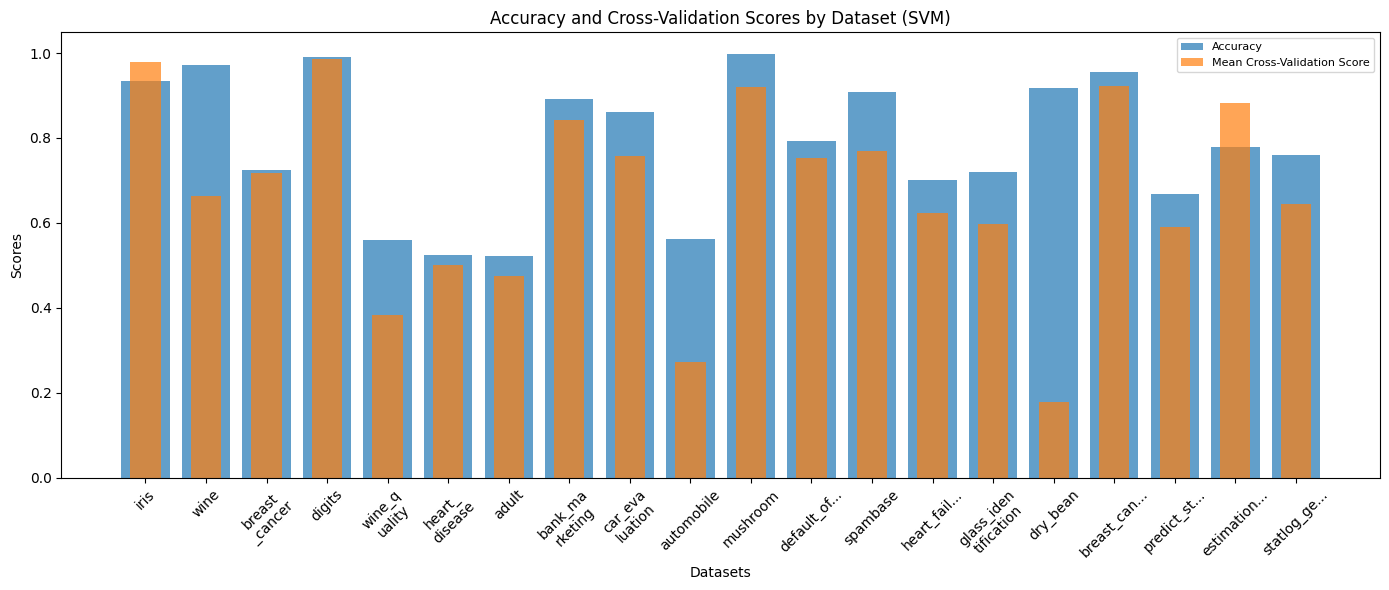

In [9]:
#knn classifier
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

average_accuracy = 0
accuracies = []
mean_cv_scores = []
for data_set in data_list:
    X = data_set.data.features
    y = data_set.data.targets

    # Preprocess the data
    X = preprocess_data(X)

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    
    # Ensure y is a 1D array
    y = np.ravel(y)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Standardization
    scaler = StandardScaler(with_mean=False)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train the KNN classifier
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    
    #classifier = HistGradientBoostingClassifier(random_state=42, max_iter=100, learning_rate=0.1, max_depth=None)
    #classifier.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier and get accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Dataset: {data_names[i]}')
    print(f'Accuracy: {accuracy:.2f}')
    
    # Perform cross-validation
    cv_scores = cross_val_score(classifier, X, y, cv=3)
    mean_cv = cv_scores.mean()
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation score: {mean_cv:.2f}')
    print(" ")
    accuracies.append(accuracy)
    mean_cv_scores.append(mean_cv)
    average_accuracy += accuracy
    
print(f'Average accuracy: {average_accuracy/data_list.__len__():.2f}')
# Plotting the results
plt.figure(figsize=(14, 6))
x_labels = [
    name[:10] + '...' if len(name) > 20 else (name[:len(name)//2] + '\n' + name[len(name)//2:] if len(name) > 10 else name)
    for name in data_names
]
x_positions = range(len(data_list))

plt.bar(x_positions, accuracies, alpha=0.7, label='Accuracy')
plt.bar(x_positions, mean_cv_scores, alpha=0.7, label='Mean Cross-Validation Score', width=0.5)

# Adjusting text and legend sizes
plt.xticks(x_positions, x_labels, rotation=45, fontsize=10)  # Smaller font size for x-axis labels
plt.yticks(fontsize=10)  # Smaller font size for y-axis labels
plt.xlabel('Datasets', fontsize=10)  # Smaller font size for x-axis label
plt.ylabel('Scores', fontsize=10)  # Smaller font size for y-axis label
plt.title('Accuracy and Cross-Validation Scores by Dataset (SVM)', fontsize=12)  # Smaller font size for title
plt.legend(fontsize=8)

plt.tight_layout()
plt.show()

Dataset:  iris
Silhouette Score: 0.19680712632697808
Adjusted Rand Index (ARI): 0.70
Normalized Mutual Information (NMI): 0.78


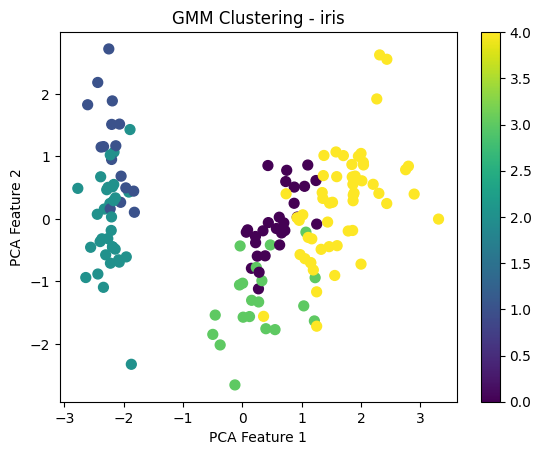

Dataset:  wine
Silhouette Score: 0.1788611302327193
Adjusted Rand Index (ARI): 0.65
Normalized Mutual Information (NMI): 0.75


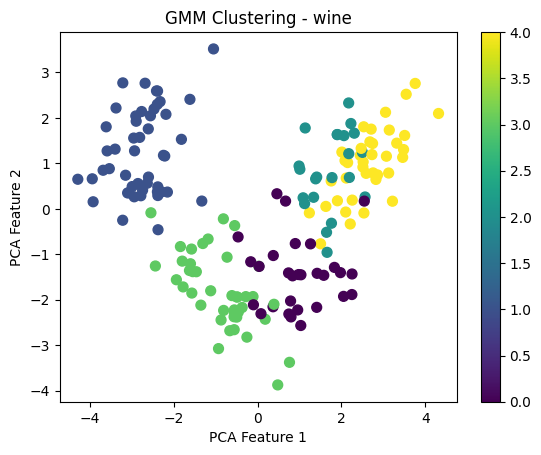

Dataset:  breast_cancer
Dataset breast_cancer is sparse. Converting to dense format.
Silhouette Score: 0.0545432566142354
Adjusted Rand Index (ARI): 0.04
Normalized Mutual Information (NMI): 0.05


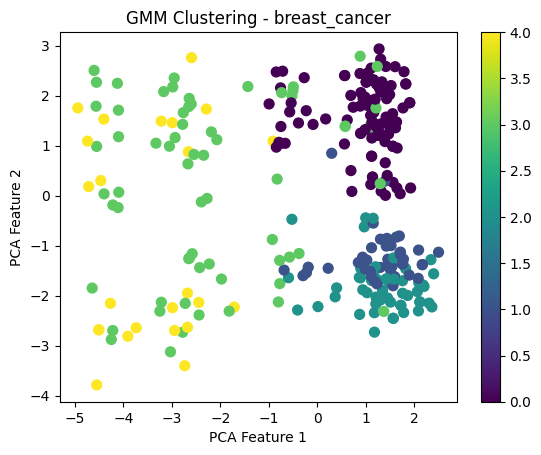

Dataset:  digits
Silhouette Score: 0.23300760343454505
Adjusted Rand Index (ARI): 0.41
Normalized Mutual Information (NMI): 0.63


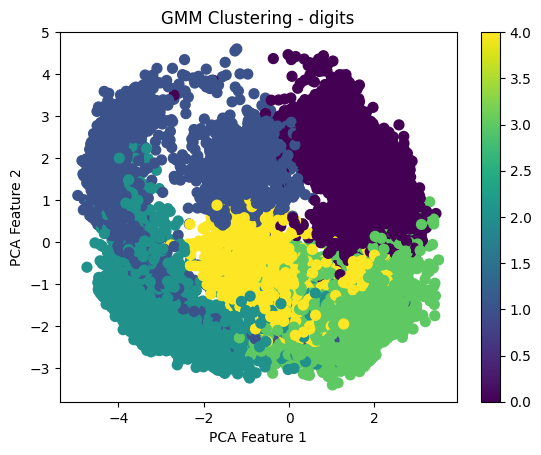

Dataset:  wine_quality
Silhouette Score: 0.10836059097353032
Adjusted Rand Index (ARI): 0.04
Normalized Mutual Information (NMI): 0.06


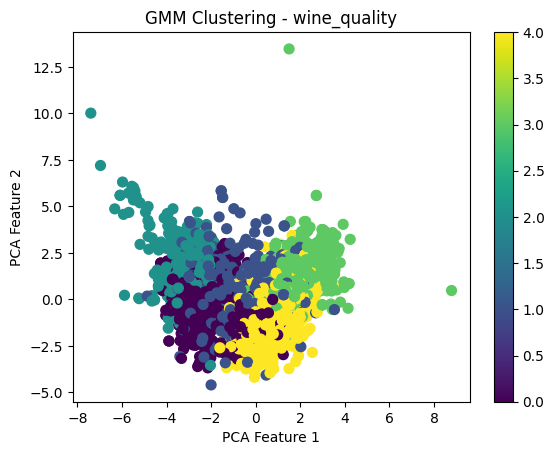

Dataset:  heart_disease
Silhouette Score: 0.06385458630777682
Adjusted Rand Index (ARI): 0.04
Normalized Mutual Information (NMI): 0.16


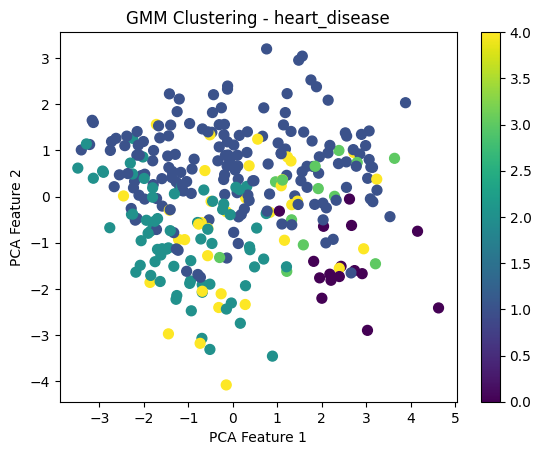

Dataset:  adult
Dataset adult is sparse. Converting to dense format.
Silhouette Score: 0.01304939853853913
Adjusted Rand Index (ARI): 0.02
Normalized Mutual Information (NMI): 0.07


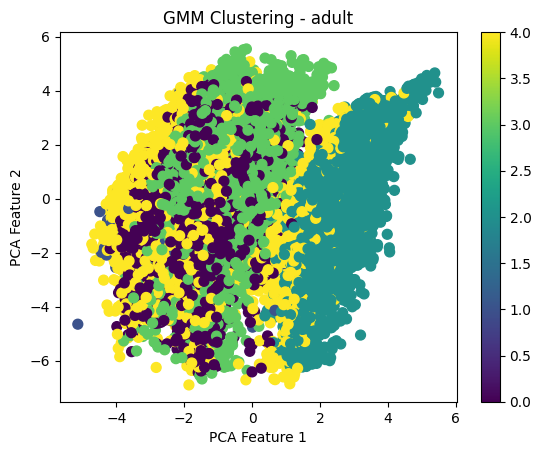

Dataset:  bank_marketing
Silhouette Score: 0.04372018498727591
Adjusted Rand Index (ARI): 0.01
Normalized Mutual Information (NMI): 0.02


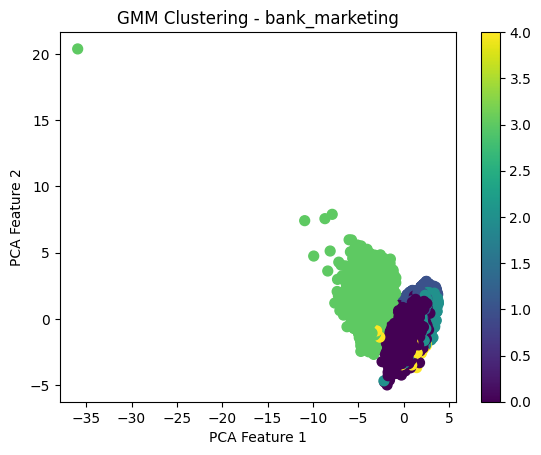

Dataset:  car_evaluation
Dataset car_evaluation is sparse. Converting to dense format.
Silhouette Score: 0.09575919498565784
Adjusted Rand Index (ARI): -0.00
Normalized Mutual Information (NMI): 0.06


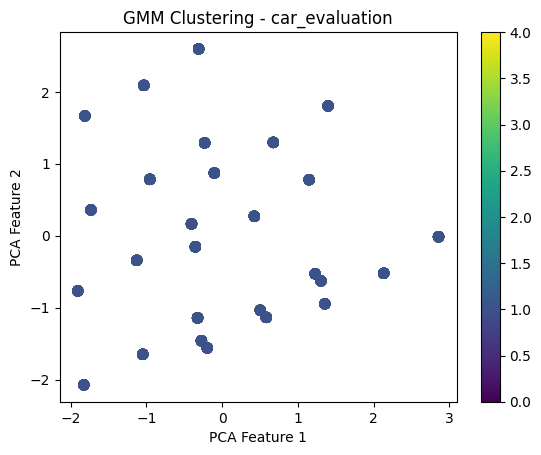

Dataset:  automobile
Silhouette Score: 0.10169931888087415
Adjusted Rand Index (ARI): 0.11
Normalized Mutual Information (NMI): 0.16


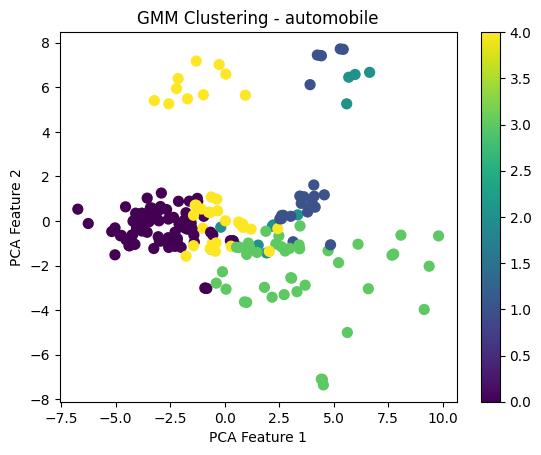

Dataset:  mushroom
Dataset mushroom is sparse. Converting to dense format.
Silhouette Score: 0.16146589835637262
Adjusted Rand Index (ARI): 0.37
Normalized Mutual Information (NMI): 0.42


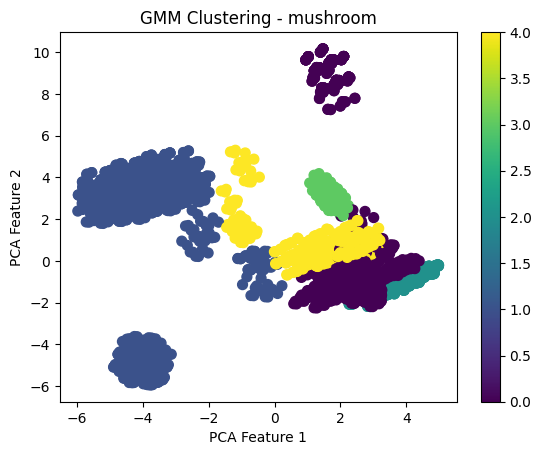

Dataset:  default_of_credit_card_clients
Silhouette Score: 0.042603446869489914
Adjusted Rand Index (ARI): 0.03
Normalized Mutual Information (NMI): 0.03


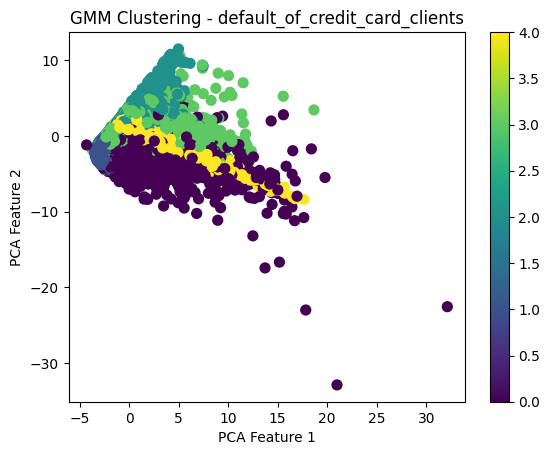

Dataset:  spambase
Silhouette Score: 0.009109137072315584
Adjusted Rand Index (ARI): 0.21
Normalized Mutual Information (NMI): 0.23


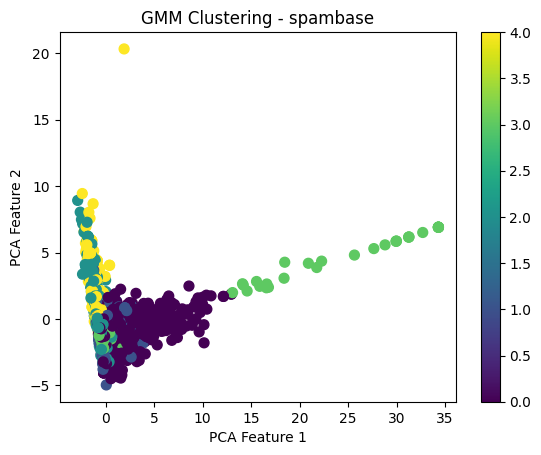

Dataset:  heart_failure_clinical_records
Silhouette Score: 0.08400009007556734
Adjusted Rand Index (ARI): 0.01
Normalized Mutual Information (NMI): 0.01


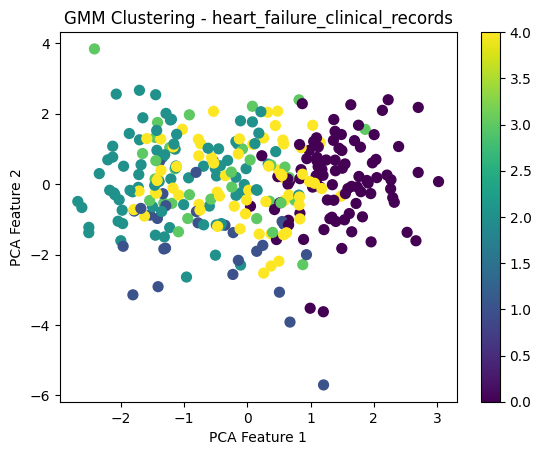

Dataset:  glass_identification
Silhouette Score: 0.2890886953743056
Adjusted Rand Index (ARI): 0.23
Normalized Mutual Information (NMI): 0.34


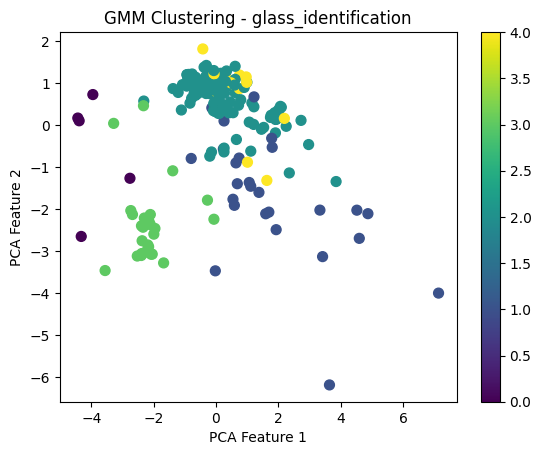

Dataset:  dry_bean
Silhouette Score: 0.32347352051606965
Adjusted Rand Index (ARI): 0.52
Normalized Mutual Information (NMI): 0.67


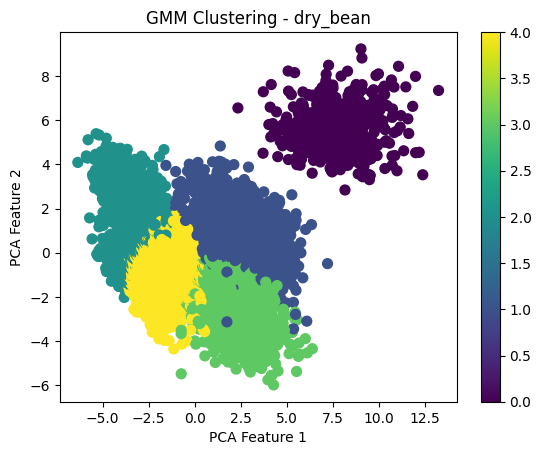

Dataset:  breast_cancer_wisconsin_diagnostic
Silhouette Score: 0.12116081470129617
Adjusted Rand Index (ARI): 0.27
Normalized Mutual Information (NMI): 0.34


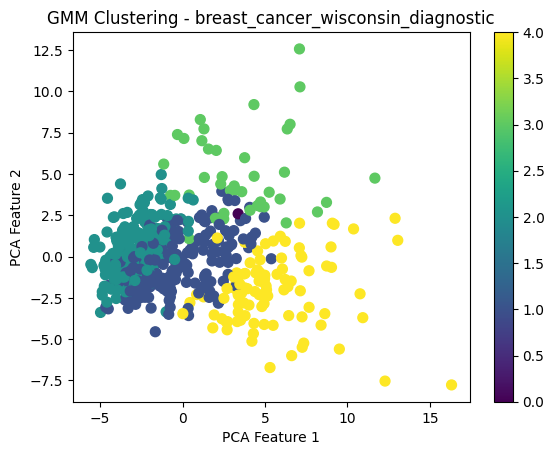

Dataset:  predict_students_dropout_and_academic_success
Silhouette Score: 0.10772300032226402
Adjusted Rand Index (ARI): 0.11
Normalized Mutual Information (NMI): 0.08


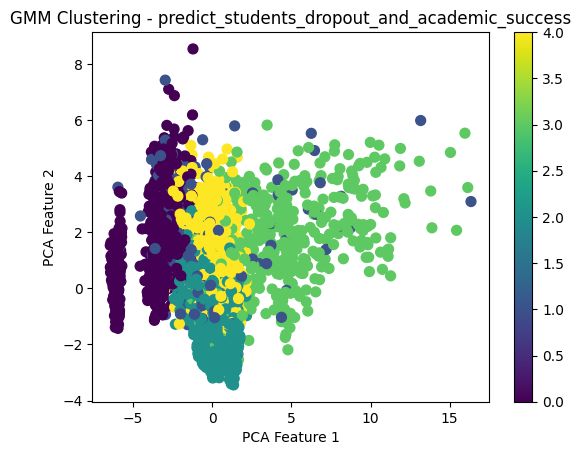

Dataset:  estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition
Silhouette Score: 0.11654400706169188
Adjusted Rand Index (ARI): 0.18
Normalized Mutual Information (NMI): 0.25


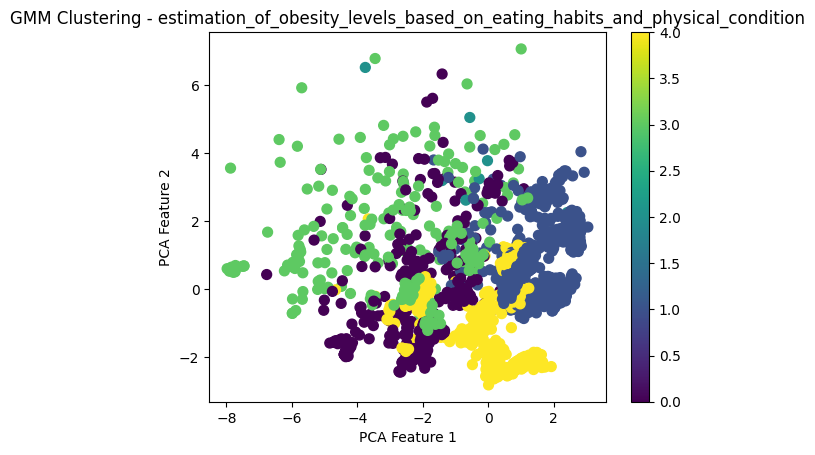

Dataset:  statlog_german_credit_data
Silhouette Score: 0.043298150150623244
Adjusted Rand Index (ARI): 0.01
Normalized Mutual Information (NMI): 0.01


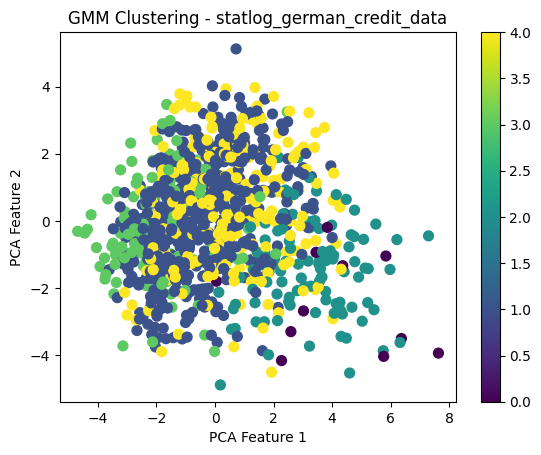

Average Silhouette Score: 0.12
Average Adjusted Rand Index (ARI): 0.20
Average Normalized Mutual Information (NMI): 0.26
Average Explained Variance by PCA: 0.37


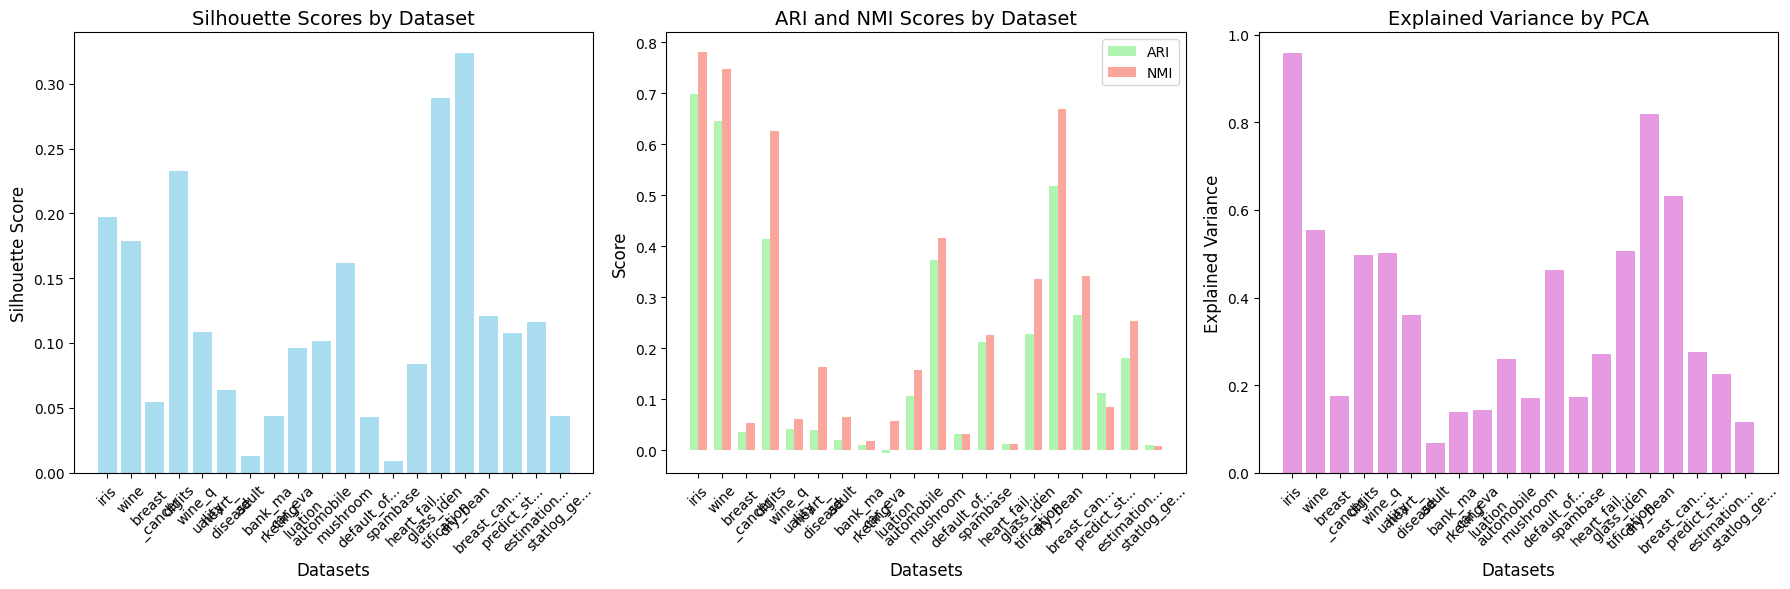

In [13]:
# Import necessary libraries
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.sparse import issparse

silhouette_scores = []
adjusted_rand_indices = []
normalized_mutual_infos = []
explained_variances = []
valid_dataset_names = []

# Iterate over the datasets
for i, dataset in enumerate(data_list):

    print("Dataset: ", data_names[i])
    X = dataset.data.features
    y_true = dataset.data.targets
    # Preprocess the data
    X = preprocess_data(X)

    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)

    # Ensure y_true is a 1D array
    y_true = np.ravel(y_true)

    # Convert sparse data to dense if necessary
    if issparse(X):
        print(f"Dataset {data_names[i]} is sparse. Converting to dense format.")
        X = X.toarray()
    scaler = StandardScaler(with_mean=False)
    X_scaled = scaler.fit_transform(X)
    
    # Choose the number of components (clusters)
    n_components = 5 
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_scaled)
    
    # Predict cluster labels
    clusters = gmm.predict(X_scaled)
    
    
    # Calculate silhouette score
    score = silhouette_score(X_scaled, clusters)
    ari = adjusted_rand_score(y_true, clusters)
    nmi = normalized_mutual_info_score(y_true, clusters)
    print(f"Silhouette Score: {score}")
    print(f"Adjusted Rand Index (ARI): {ari:.2f}")
    print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

    # Store the metrics
    silhouette_scores.append(score)
    adjusted_rand_indices.append(ari)
    normalized_mutual_infos.append(nmi)
    
    # Reduce to 2 dimensions for visualization
    pca = PCA(n_components=2)  
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)
    valid_dataset_names.append(data_names[i])
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
    plt.title(f"GMM Clustering - {data_names[i]}")
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")
    plt.colorbar()
    plt.show()

if len(silhouette_scores) > 0:
    average_silhouette = np.mean(silhouette_scores)
    average_ari = np.mean(adjusted_rand_indices)
    average_nmi = np.mean(normalized_mutual_infos)
    average_explained_variance = np.mean(explained_variances)

    print(f"Average Silhouette Score: {average_silhouette:.2f}")
    print(f"Average Adjusted Rand Index (ARI): {average_ari:.2f}")
    print(f"Average Normalized Mutual Information (NMI): {average_nmi:.2f}")
    print(f"Average Explained Variance by PCA: {average_explained_variance:.2f}")

    # Plotting the results
    plt.figure(figsize=(18, 6))

    # Silhouette Scores
    plt.subplot(1, 3, 1)
    x_labels = [
        name[:10] + '...' if len(name) > 20 else
        (name[:len(name)//2] + '\n' + name[len(name)//2:] if len(name) > 10 else name)
        for name in valid_dataset_names
    ]
    x_positions = range(len(valid_dataset_names))
    plt.bar(x_positions, silhouette_scores, alpha=0.7, color='skyblue')
    plt.xticks(x_positions, x_labels, rotation=45, fontsize=10)
    plt.xlabel('Datasets', fontsize=12)
    plt.ylabel('Silhouette Score', fontsize=12)
    plt.title('Silhouette Scores by Dataset', fontsize=14)
    plt.tight_layout()

    # Adjusted Rand Index and Normalized Mutual Information
    plt.subplot(1, 3, 2)
    width = 0.35
    plt.bar([p - width/2 for p in x_positions], adjusted_rand_indices, width=width, alpha=0.7, label='ARI', color='lightgreen')
    plt.bar([p + width/2 for p in x_positions], normalized_mutual_infos, width=width, alpha=0.7, label='NMI', color='salmon')
    plt.xticks(x_positions, x_labels, rotation=45, fontsize=10)
    plt.xlabel('Datasets', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.title('ARI and NMI Scores by Dataset', fontsize=14)
    plt.legend(fontsize=10)
    plt.tight_layout()

    # Explained Variance by PCA
    plt.subplot(1, 3, 3)
    plt.bar(x_positions, explained_variances, alpha=0.7, color='orchid')
    plt.xticks(x_positions, x_labels, rotation=45, fontsize=10)
    plt.xlabel('Datasets', fontsize=12)
    plt.ylabel('Explained Variance', fontsize=12)
    plt.title('Explained Variance by PCA', fontsize=14)
    plt.tight_layout()

    plt.show()
